In [7]:
pip install google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install textblob



  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 487.6 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/626.3 kB 487.6 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/626.3 kB 487.6 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 467.6 kB/s eta 0:00:02
   -------- ----------------------------- 14

In [63]:
from google_play_scraper import app, reviews, Sort
import pandas as pd
from textblob import TextBlob

# List of app IDs for the specified apps
app_ids = [
    'com.nike.ntc',
    'com.strava',
    'com.myfitnesspal.android',
    'com.runtastic.android',
    'com.centr.app'
]

# Function to get app details
def get_app_details(app_id):
    try:
        details = app(app_id)
        return {
            'App Name': details['title'],
            'Developer': details['developer'],
            'Rating': details['score'],
            'Reviews': details['reviews'],
            'Installs': details['installs']
        }
    except Exception as e:
        print(f"Failed to get details for app {app_id}: {e}")
        return None

# Function to get reviews for an app with a limit on the number of reviews
def get_app_reviews(app_id, num_reviews=5000):
    try:
        result, _ = reviews(
            app_id,
            lang='en',  # Language
            sort=Sort.NEWEST,  # Sorting order using the Sort enum
            count=num_reviews  # Limit the number of reviews
        )
        return result
    except Exception as e:
        print(f"Failed to get reviews for app {app_id}: {e}")
        return []

# Function to analyze sentiment of a review
def analyze_sentiment(review_text):
    analysis = TextBlob(review_text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

all_reviews_data = []

# Extract app details and reviews for each specified app
for index, app_id in enumerate(app_ids):
    app_details = get_app_details(app_id)
    
    # Skip if app details are not found
    if app_details is None:
        continue

    app_reviews = get_app_reviews(app_id)

    for review in app_reviews:
        polarity, subjectivity = analyze_sentiment(review['content'])
        review_data = {
            'App Name': app_details['App Name'],
            'Developer': app_details['Developer'],
            'Rating': app_details['Rating'],
            'Review Content': review['content'],
            'Review Rating': review['score'],
            'Review Date': review['at'],
            'Polarity': polarity,
            'Subjectivity': subjectivity
        }
        all_reviews_data.append(review_data)
    
    # Print progress update
    print(f"Processed {index + 1}/{len(app_ids)} apps")

# Create a DataFrame to store the data
df = pd.DataFrame(all_reviews_data)

# Save the DataFrame to an Excel file in the current working directory
excel_file_path = 'fitness_app_reviews_with_sentiment.xlsx'
df.to_excel(excel_file_path, index=False)

# Display the DataFrame
print(df)


Processed 1/5 apps
Processed 2/5 apps
Processed 3/5 apps
Processed 4/5 apps
Processed 5/5 apps
                           App Name   Developer    Rating  \
0       Nike Training Club: Fitness  Nike, Inc.  4.423201   
1       Nike Training Club: Fitness  Nike, Inc.  4.423201   
2       Nike Training Club: Fitness  Nike, Inc.  4.423201   
3       Nike Training Club: Fitness  Nike, Inc.  4.423201   
4       Nike Training Club: Fitness  Nike, Inc.  4.423201   
...                             ...         ...       ...   
24995  Centr: Personal Training App       Centr  3.995745   
24996  Centr: Personal Training App       Centr  3.995745   
24997  Centr: Personal Training App       Centr  3.995745   
24998  Centr: Personal Training App       Centr  3.995745   
24999  Centr: Personal Training App       Centr  3.995745   

                                          Review Content  Review Rating  \
0      I've been using this app for years and I've ne...              4   
1      It's probably t

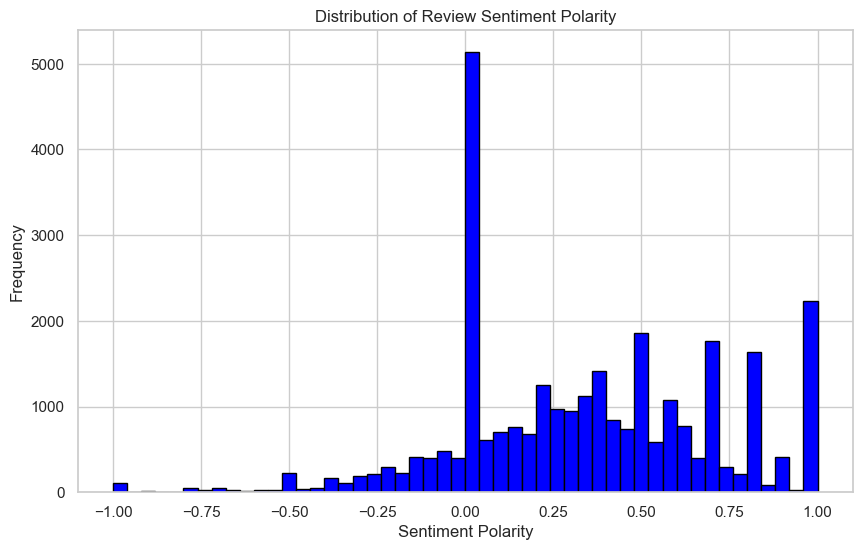

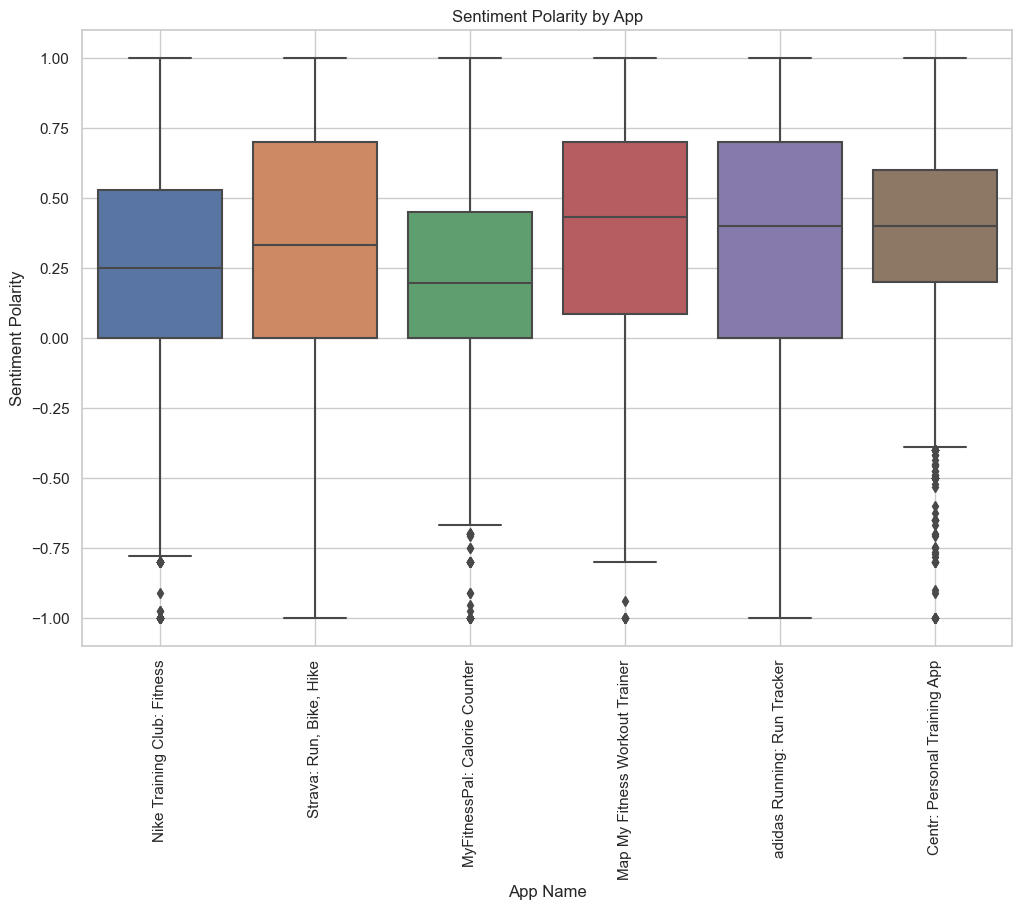

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the generated Excel sheet (update the file path to your local path)
excel_file_path = 'C:\\Users\welcome\\OneDrive - National University of Ireland, Galway\\BIS\\Reviews.xlsx'
df = pd.read_excel(excel_file_path)

# Plot the distribution of sentiment polarity
plt.figure(figsize=(10, 6))
plt.hist(df['Polarity'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Review Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot of sentiment polarity by app
plt.figure(figsize=(12, 8))
sns.boxplot(x='App Name', y='Polarity', data=df)
plt.title('Sentiment Polarity by App')
plt.xticks(rotation=90)
plt.xlabel('App Name')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.show()


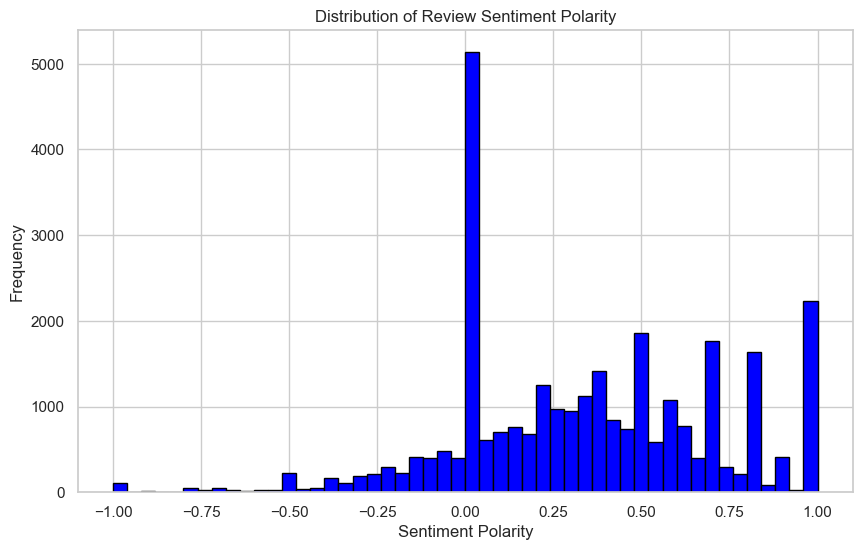

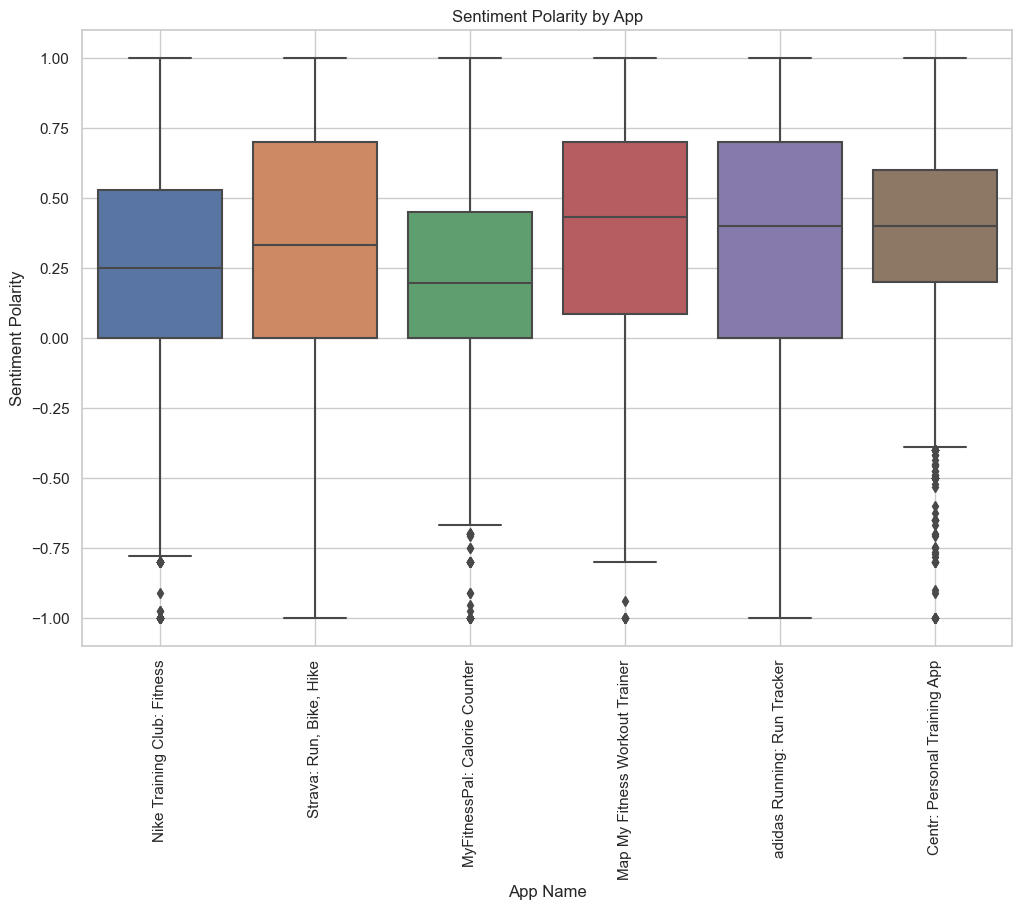

                         App Name  Polarity
1  Map My Fitness Workout Trainer  0.405743
0    Centr: Personal Training App  0.391467
5     adidas Running: Run Tracker  0.373034
4         Strava: Run, Bike, Hike  0.348145
3     Nike Training Club: Fitness  0.283980
2   MyFitnessPal: Calorie Counter  0.226457


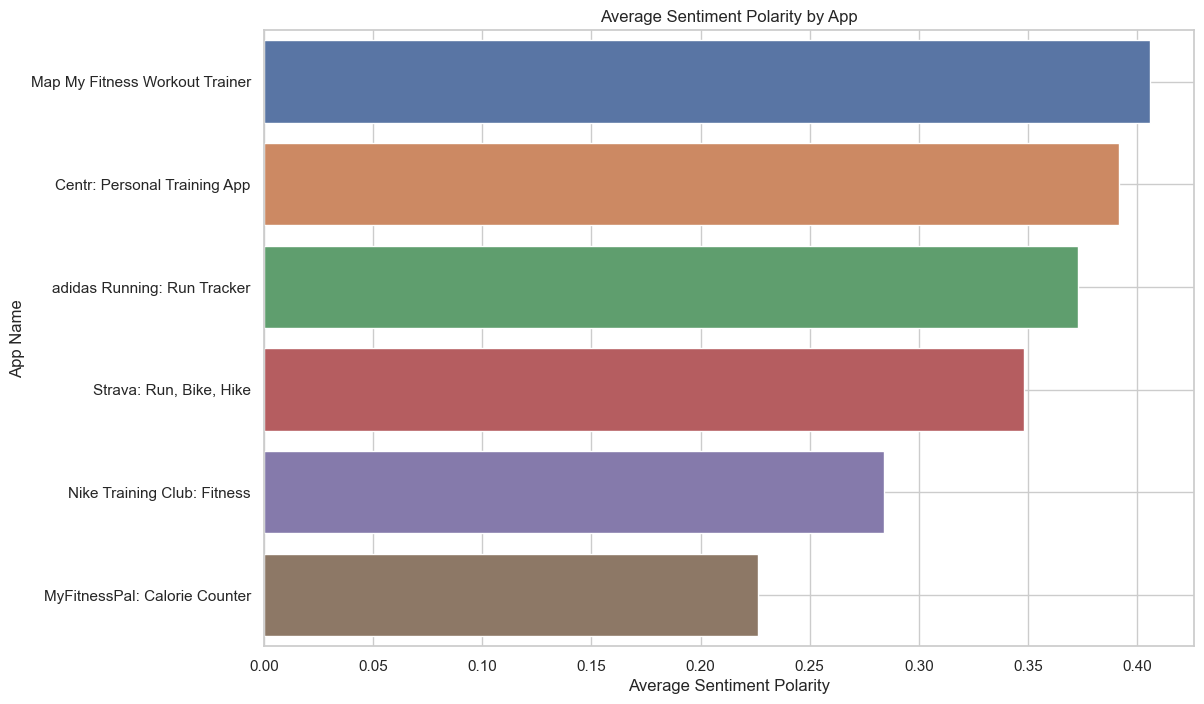

In [58]:
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the generated Excel sheet (update the file path to your local path)
df = pd.read_excel(excel_file_path)

# Plot the distribution of sentiment polarity
plt.figure(figsize=(10, 6))
plt.hist(df['Polarity'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Review Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot of sentiment polarity by app
plt.figure(figsize=(12, 8))
sns.boxplot(x='App Name', y='Polarity', data=df)
plt.title('Sentiment Polarity by App')
plt.xticks(rotation=90)
plt.xlabel('App Name')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.show()

# Calculate the average polarity for each app
average_polarity = df.groupby('App Name')['Polarity'].mean().reset_index()
average_polarity = average_polarity.sort_values(by='Polarity', ascending=False)

# Display the average sentiment polarity by app
print(average_polarity)

# Plot the average sentiment polarity by app
plt.figure(figsize=(12, 8))
sns.barplot(x='Polarity', y='App Name', data=average_polarity)
plt.title('Average Sentiment Polarity by App')
plt.xlabel('Average Sentiment Polarity')
plt.ylabel('App Name')
plt.grid(True)
plt.show()

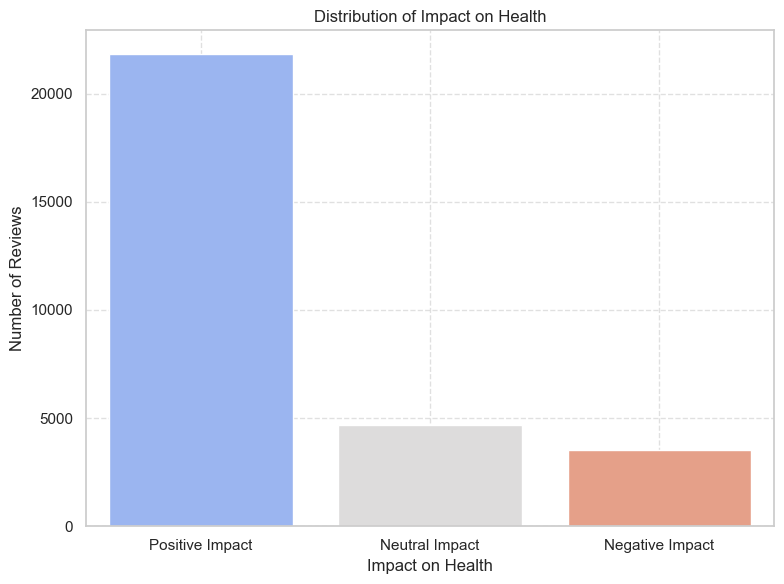

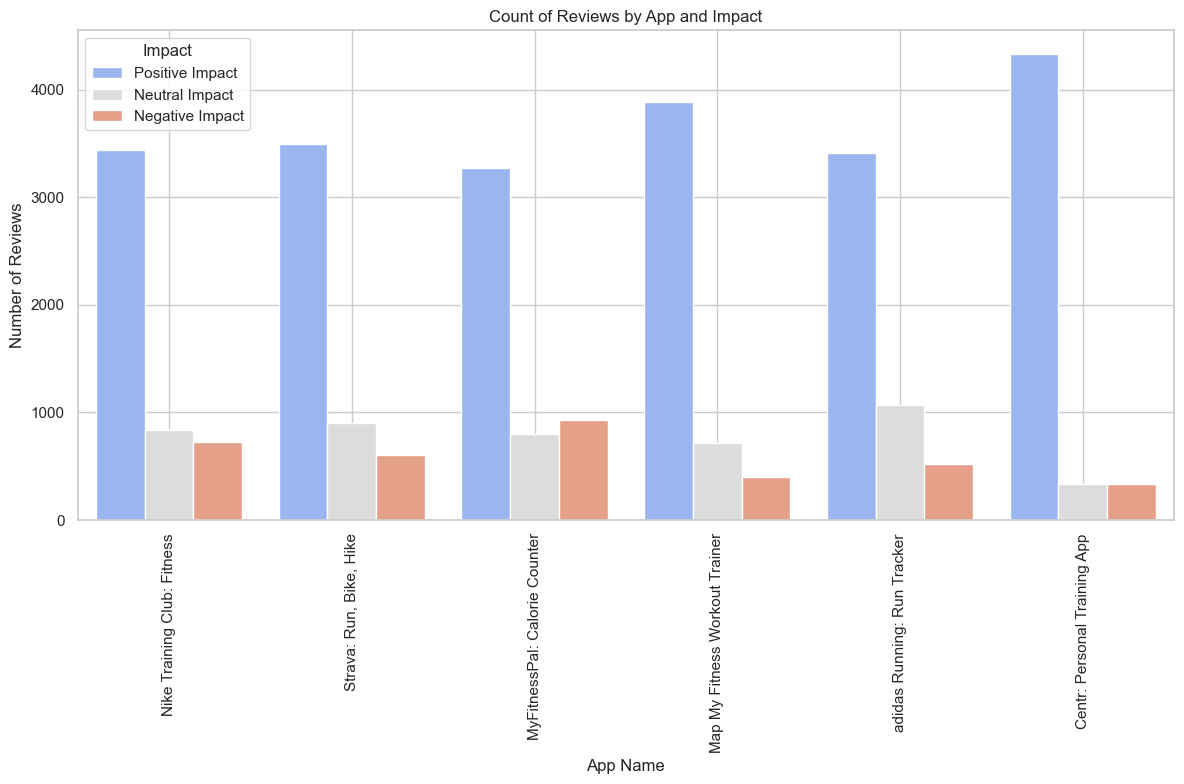

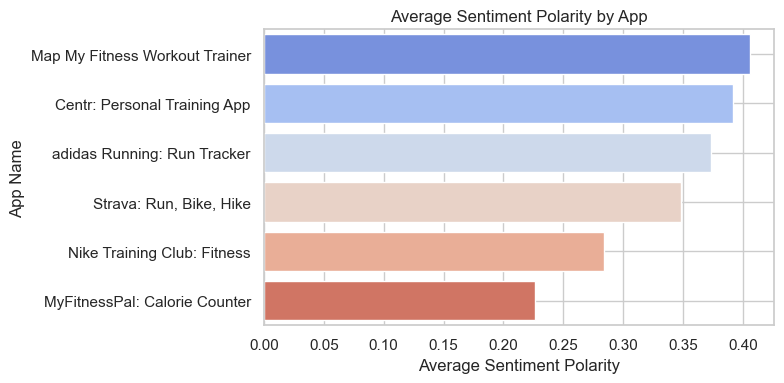

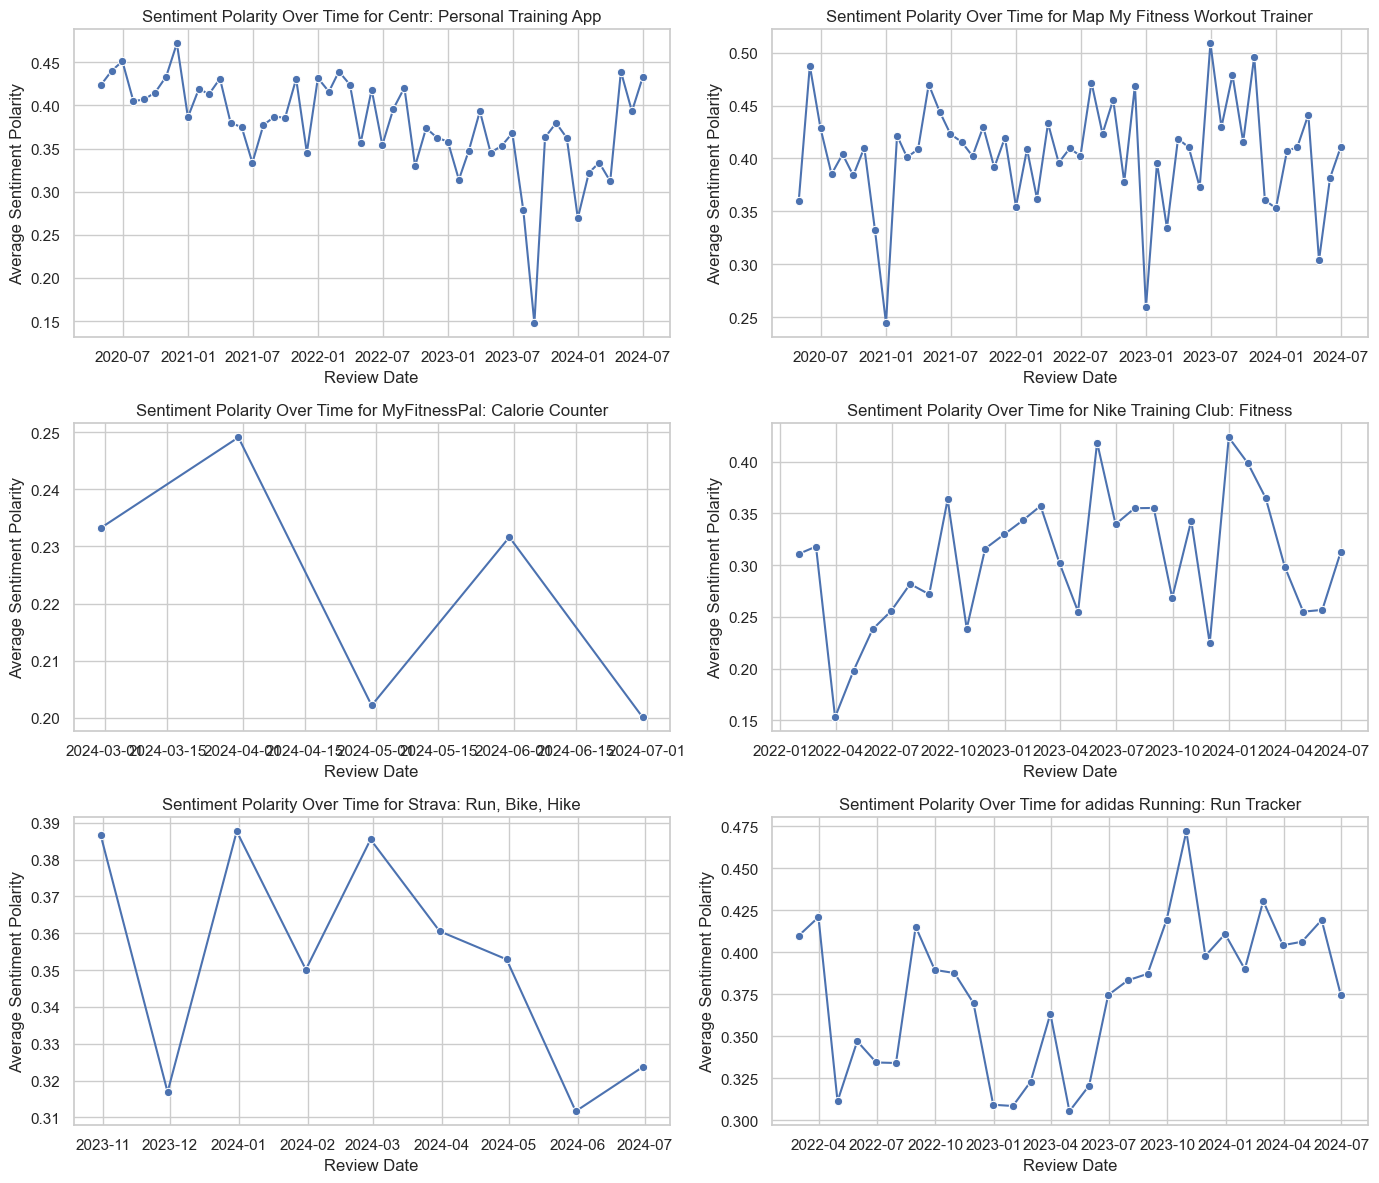

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the generated Excel sheet (update the file path to your local path)
excel_file_path = r'C:\Users\welcome\OneDrive - National University of Ireland, Galway\BIS\Reviews.xlsx'

# Check if the file exists
if not os.path.exists(excel_file_path):
    print(f"File not found: {excel_file_path}")
else:
    df = pd.read_excel(excel_file_path)

    # Ensure that only the relevant numeric columns are used for aggregation
    numeric_columns = ['Rating', 'Review Rating', 'Polarity', 'Subjectivity']

    # Convert columns to numeric, forcing errors to NaN
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Drop rows with NaN values in numeric columns
    df = df.dropna(subset=numeric_columns)

    # Categorize reviews based on sentiment polarity
    def categorize_sentiment(polarity):
        if polarity > 0:
            return 'Positive Impact'
        elif polarity < 0:
            return 'Negative Impact'
        else:
            return 'Neutral Impact'

    df['Impact'] = df['Polarity'].apply(categorize_sentiment)

    # Set the style for the plots
    sns.set(style="whitegrid")

    # 1. Distribution of Reviews by Impact
    # plt.figure(figsize=(10, 6))
    # sns.countplot(x='Impact', data=df, palette='coolwarm')
    # plt.title('Distribution of Reviews by Impact on Health')
    # plt.xlabel('Impact on Health')
    # plt.ylabel('Number of Reviews')
    # plt.grid(True)
    # plt.tight_layout()
    # plt.savefig('reviews_by_impact.png')
    # plt.show()
    

    # First, calculate the counts for each category
    impact_counts = df['Impact'].value_counts().reset_index()
    impact_counts.columns = ['Impact on Health', 'Counts']

    # Now use sns.barplot to plot these counts
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Impact on Health', y='Counts', data=impact_counts, palette='coolwarm')

    plt.title('Distribution of Impact on Health')
    plt.xlabel('Impact on Health')
    plt.ylabel('Number of Reviews')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # 2. Count of Reviews by App and Impact
    plt.figure(figsize=(12, 8))
    sns.countplot(x='App Name', hue='Impact', data=df, palette='coolwarm')
    plt.title('Count of Reviews by App and Impact')
    plt.xticks(rotation=90)
    plt.xlabel('App Name')
    plt.ylabel('Number of Reviews')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('count_of_reviews_by_app_and_impact.png')
    plt.show()

    # 3. Calculate the average polarity for each app
    average_polarity = df.groupby('App Name')['Polarity'].mean().reset_index()
    average_polarity = average_polarity.sort_values(by='Polarity', ascending=False)

    # Barplot of Average Sentiment Polarity by App
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Polarity', y='App Name', data=average_polarity, palette='coolwarm')
    plt.title('Average Sentiment Polarity by App')
    plt.xlabel('Average Sentiment Polarity')
    plt.ylabel('App Name')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('average_sentiment_polarity_by_app.png')
    plt.show()

    # 4. Time-Series Analysis of Sentiment Polarity (optional)
    df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')
    df = df.dropna(subset=['Review Date'])

        # 4. Time-Series Analysis of Sentiment Polarity with Subplots
    df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')
    df = df.dropna(subset=['Review Date'])

    # Group by 'App Name' and resample for each group
    df_resampled = df.groupby('App Name').resample('M', on='Review Date')['Polarity'].mean().reset_index()

    # Find unique app names to create subplots
    apps = df_resampled['App Name'].unique()
    n_apps = len(apps)
    fig, axes = plt.subplots(nrows=(n_apps // 2) + (n_apps % 2), ncols=2, figsize=(14, n_apps * 2))

    # Flatten the array of axes for easy iteration
    axes = axes.flatten()

    # Plot each app on a separate subplot
    for i, app in enumerate(apps):
        app_data = df_resampled[df_resampled['App Name'] == app]
        sns.lineplot(x='Review Date', y='Polarity', data=app_data, ax=axes[i], marker='o')
        axes[i].set_title(f'Sentiment Polarity Over Time for {app}')
        axes[i].set_xlabel('Review Date')
        axes[i].set_ylabel('Average Sentiment Polarity')

    # Adjust layout and plot
    plt.tight_layout()
    plt.show()


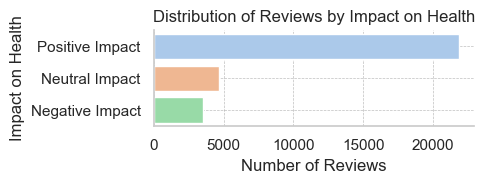

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'impact_counts' DataFrame is already created with the columns 'Impact on Health' and 'Counts'
plt.figure(figsize=(5, 2))  # Smaller and more elongated figure
sns.barplot(x='Counts', y='Impact on Health', data=impact_counts, palette='pastel')  # Horizontal bars

plt.title('Distribution of Reviews by Impact on Health')
plt.xlabel('Number of Reviews')
plt.ylabel('Impact on Health')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)  # Lighter grid
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

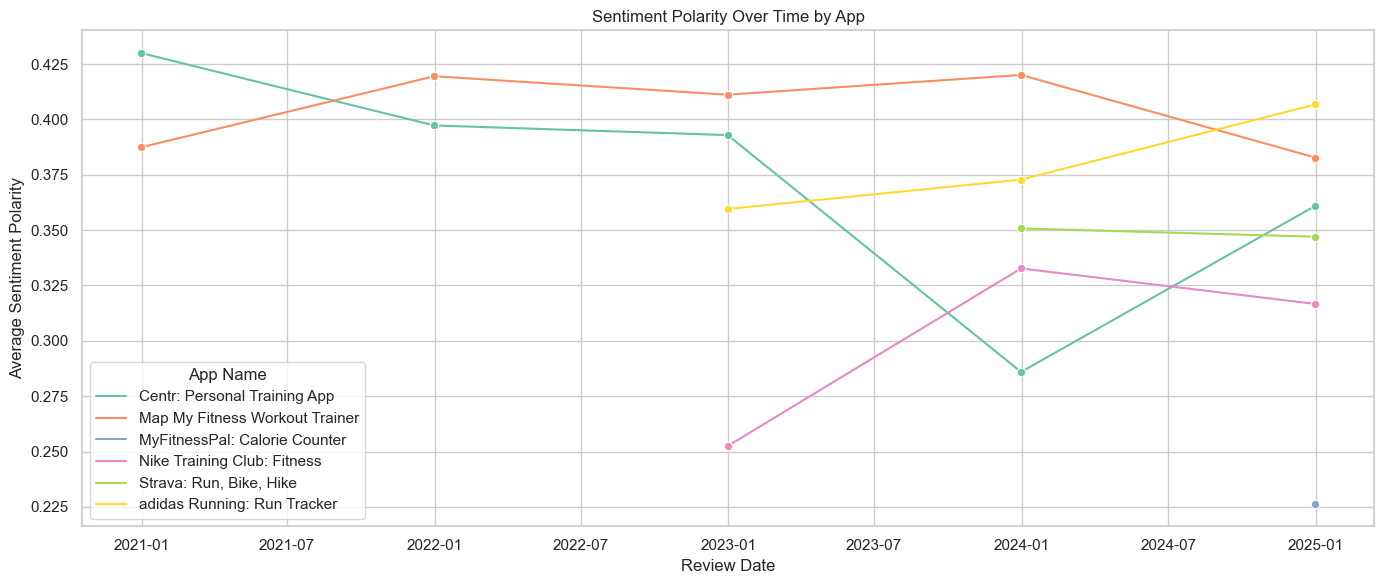

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Convert 'Review Date' to datetime and drop rows with invalid or missing dates
df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')
df = df.dropna(subset=['Review Date', 'Polarity', 'App Name'])

# Group by 'App Name' and resample for each group
df_resampled = df.groupby('App Name').resample('Y', on='Review Date')['Polarity'].mean().reset_index()

# Create a single plot for all apps
plt.figure(figsize=(14, 6))
sns.lineplot(x='Review Date', y='Polarity', hue='App Name', data=df_resampled, marker='o', palette='Set2')
plt.title('Sentiment Polarity Over Time by App')
plt.xlabel('Review Date')
plt.ylabel('Average Sentiment Polarity')
plt.grid(True)  # Adding a grid for better readability
plt.legend(title='App Name')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


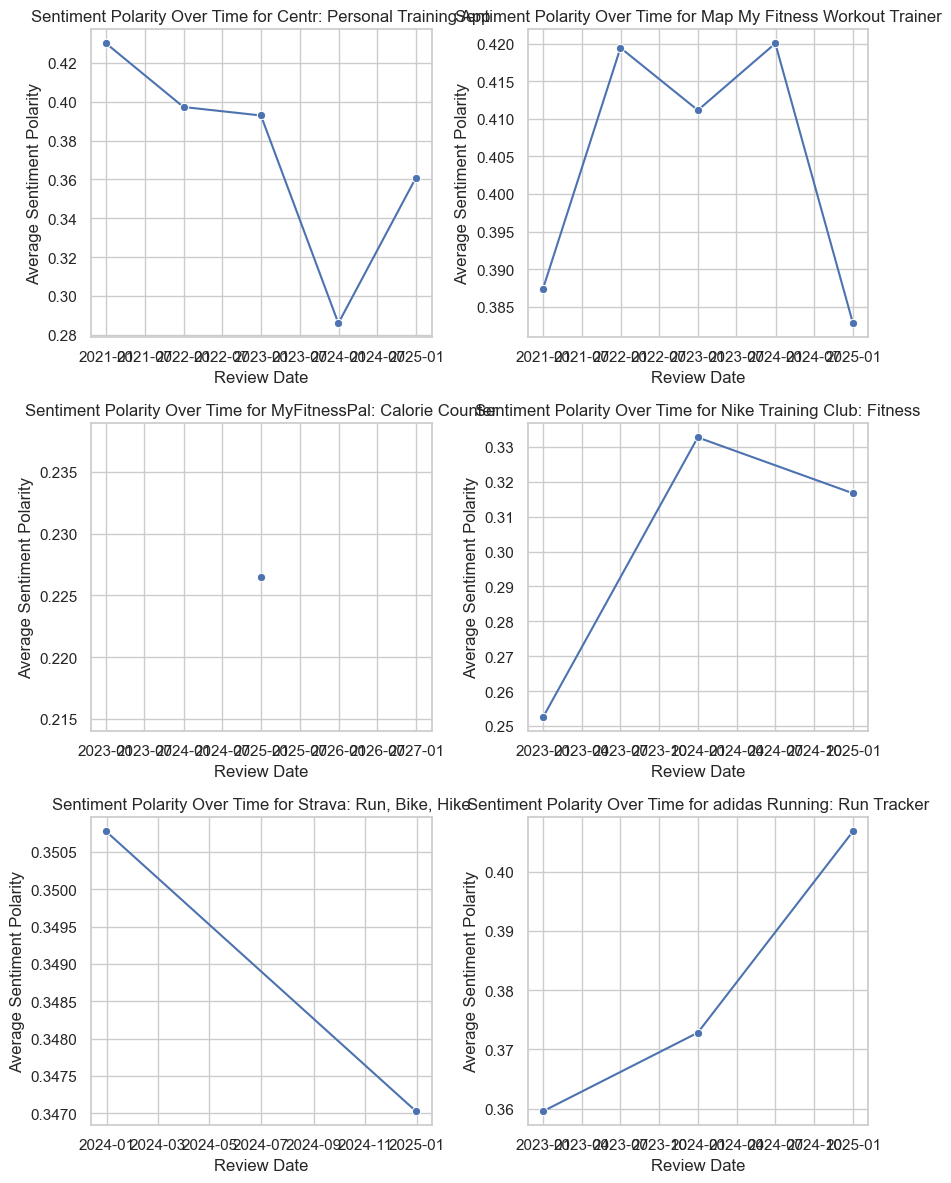

In [89]:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Assuming 'df' is your DataFrame

    # Convert 'Review Date' to datetime and drop rows with invalid or missing dates
    df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')
    df = df.dropna(subset=['Review Date', 'Polarity', 'App Name'])

    # Group by 'App Name' and resample yearly for each group
    df_resampled = df.groupby('App Name').resample('Y', on='Review Date')['Polarity'].mean().reset_index()

 # Find unique app names to create subplots
    apps = df_resampled['App Name'].unique()
    n_apps = len(apps)
    fig, axes = plt.subplots(nrows=(n_apps // 2) + (n_apps % 2), ncols=2, figsize=(9, n_apps * 2))

    # Flatten the array of axes for easy iteration
    axes = axes.flatten()

    # Plot each app on a separate subplot
    for i, app in enumerate(apps):
        app_data = df_resampled[df_resampled['App Name'] == app]
        sns.lineplot(x='Review Date', y='Polarity', data=app_data, ax=axes[i], marker='o')
        axes[i].set_title(f'Sentiment Polarity Over Time for {app}')
        axes[i].set_xlabel('Review Date')
        axes[i].set_ylabel('Average Sentiment Polarity')

    # Adjust layout and plot
    plt.tight_layout()
    plt.show()